In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


---

# Further investigation
### Kim suggest to look at the energy spectrum from the inner three columns and see how the spectrum changes after normalizing for number of counts

Will need to get a few files with the full eventTree inside... Or use the TCHain.

---

# Lets create a prototype here

th3i: energy vs. x vs. calonum

---

# Now lets import the ones processed on the virtual machines with all subruns

In [2]:
f1 = r.TFile("./data/th3/Energy_x_CaloNum_Run16554.root")
c1 = f1.Get("c1")
print([x for x in c1.GetListOfPrimitives()])
h1 = c1.GetPrimitive("h").Clone("h1")
h1.SetDirectory(0)

[<ROOT.TH3I object ("h") at 0x7fffd30b7270>, <ROOT.TPaveText object ("title") at 0x7fffd30f8820>]


In [3]:
f2 = r.TFile("./data/th3/Energy_x_CaloNum_Run16705.root")
c2 = f2.Get("c1")
print([x for x in c2.GetListOfPrimitives()])
h2 = c2.GetPrimitive("h").Clone("h2")
h2.SetDirectory(0)

[<ROOT.TH3I object ("h") at 0x7fffd31edfb0>, <ROOT.TPaveText object ("title") at 0x7fffd32073d0>]


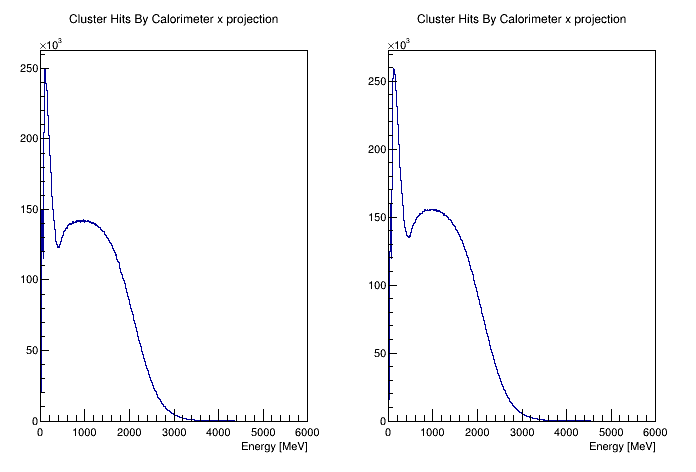

In [4]:
c = r.TCanvas()
c.Divide(2)
c.cd(1)
h1.Project3D("x").Draw()
c.cd(2)
h2.Project3D("x").Draw()
c.Draw()

In [5]:
nDivs = 6
colDivs = [x for x in range(0,nDivs+1)]
print(colDivs)

calo = 2

hists = [h1, h2]

[0, 1, 2, 3, 4, 5, 6]


In [6]:
energyHistsAll = []
for j, hi in enumerate(hists):
    energyHists = []
    for i in range(nDivs):
        x1 = colDivs[i]
        x2 = colDivs[i+1]
        
        hi.GetYaxis().SetRangeUser(x1,x2)
        hi.GetZaxis().SetRangeUser(2,2.1)
        hi_x = hi.Project3D("x").Clone("h"+str(j+1)+"_"+str(i))
        hi_x.Scale(1/(hi_x.GetEntries()))
        energyHists.append(hi_x)
    energyHistsAll.append(energyHists)

In [7]:
print(energyHistsAll)

[[<ROOT.TH1D object ("h1_0") at 0x7fffd45a8590>, <ROOT.TH1D object ("h1_1") at 0x7fffd31ec1c0>, <ROOT.TH1D object ("h1_2") at 0x7fffd45c0950>, <ROOT.TH1D object ("h1_3") at 0x7fffd45b7710>, <ROOT.TH1D object ("h1_4") at 0x7fffd459bea0>, <ROOT.TH1D object ("h1_5") at 0x7fffd45bd570>], [<ROOT.TH1D object ("h2_0") at 0x7fffd4597360>, <ROOT.TH1D object ("h2_1") at 0x7fffd45a2200>, <ROOT.TH1D object ("h2_2") at 0x7fffd45c1d00>, <ROOT.TH1D object ("h2_3") at 0x7fffd455a920>, <ROOT.TH1D object ("h2_4") at 0x7fffd45c0180>, <ROOT.TH1D object ("h2_5") at 0x7fffd458e7c0>]]


0 <ROOT.TH1D object ("h1_0") at 0x7fffd45a8590>
1 <ROOT.TH1D object ("h1_1") at 0x7fffd31ec1c0>
2 <ROOT.TH1D object ("h1_2") at 0x7fffd45c0950>
3 <ROOT.TH1D object ("h1_3") at 0x7fffd45b7710>
4 <ROOT.TH1D object ("h1_4") at 0x7fffd459bea0>
5 <ROOT.TH1D object ("h1_5") at 0x7fffd45bd570>


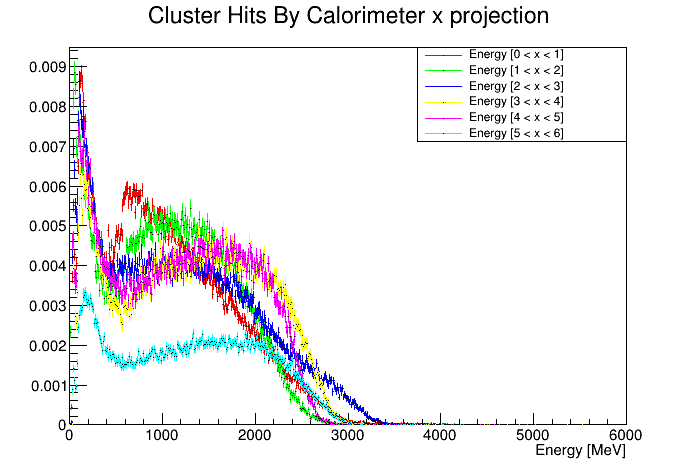

In [8]:
c = r.TCanvas()
leg = r.TLegend(0.6,0.7,0.9,0.9)

for i, hi in enumerate(energyHistsAll[0]):
    print(i, hi)
    if( i < 1 ):
        hi.Draw()
    else:
        hi.Draw("same")
    hi.SetLineColor(i+2)
    leg.AddEntry(hi,"Energy ["+str(colDivs[i])+" < x < "+str(colDivs[i+1])+"]") 
    
leg.Draw()
#c.SetLogy()
c.Draw()

0 <ROOT.TH1D object ("h2_0") at 0x7fffd4597360>
1 <ROOT.TH1D object ("h2_1") at 0x7fffd45a2200>
2 <ROOT.TH1D object ("h2_2") at 0x7fffd45c1d00>
3 <ROOT.TH1D object ("h2_3") at 0x7fffd455a920>
4 <ROOT.TH1D object ("h2_4") at 0x7fffd45c0180>
5 <ROOT.TH1D object ("h2_5") at 0x7fffd458e7c0>


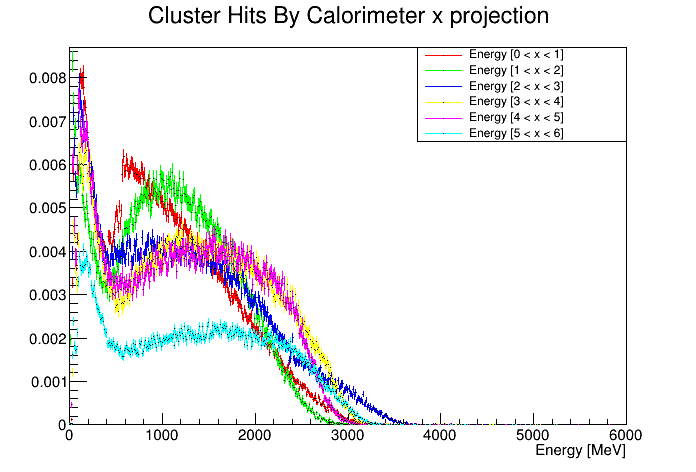

In [9]:
c = r.TCanvas()
leg = r.TLegend(0.6,0.7,0.9,0.9)

for i, hi in enumerate(energyHistsAll[1]):
    
    print(i, hi)
    if( i == 0 ):
        hi.Draw()
    else:
        #print("ding")
        hi.Draw("same")
    hi.SetLineColor(i+2)
    leg.AddEntry(hi,"Energy ["+str(colDivs[i])+" < x < "+str(colDivs[i+1])+"]") 
    
leg.Draw()
#c.SetLogy()
c.Draw()

In [10]:
e1 = 1400
e2 = 3300
endpointLin = r.TF1("endpointLin","pol1",e1,e2)

[0.005139861374242251, -1.6125556944533467e-06]
[0.00335047649460763, -1.0901320711743536e-06]
[0.006977820561727607, -2.1059179842468077e-06]
[0.00846057478066739, -2.741906550870676e-06]
[0.004237817870431496, -1.3764628030352337e-06]
[0.00408205640971966, -1.2931056382423508e-06]
 FCN=10004.1 FROM MINOS     STATUS=SUCCESSFUL     10 CALLS         117 TOTAL
                     EDM=2.7627e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.98776e-03   1.95384e-05   0.00000e+00  -1.18863e+00
   2  p1          -1.55157e-06   6.21216e-09   6.21216e-09   2.26516e-01
 FCN=28004.8 FROM MINOS     STATUS=SUCCESSFUL     10 CALLS          73 TOTAL
                     EDM=1.44443e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR 

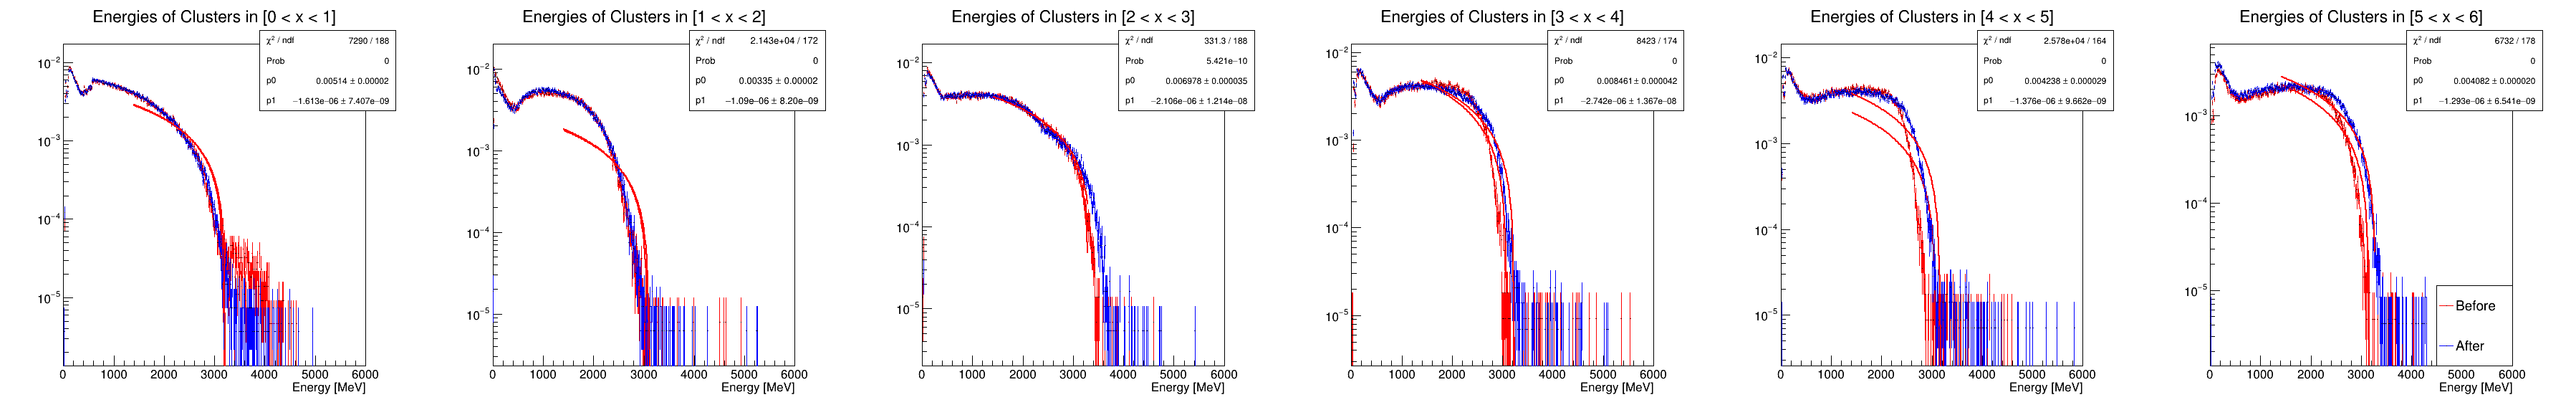

In [11]:
c = r.TCanvas("c","c",nDivs*600,600)
c.Divide(nDivs)

fitPars = []

for i, (h1_x, h2_x) in enumerate(zip(*energyHistsAll)):
    endpointLin.SetParameters(0.0001,0.0000001)
    fitsi = []
    #print( i, (h1_x, h2_x) )
    c.cd(i+1)
    h1_x.Draw("")
    h1_x.SetTitle("Energies of Clusters in ["+str(colDivs[i])+" < x < "+str(colDivs[i+1])+"]")
    h1_x.SetLineColor(2)
    h1_x.Fit("endpointLin","REMBQ")
    print([endpointLin.GetParameter(x) for x in range(2)])
    fitsi.append([endpointLin.GetParameter(x) for x in range(2)])
    
    h2_x.Draw("SAME")
    h2_x.SetLineColor(4)
    endpointLin.SetParameters(0.0001,0.0000001)
    h2_x.Fit("endpointLin","REMB")
    fitsi.append([endpointLin.GetParameter(x) for x in range(2)])
    fitPars.append(fitsi)
    
    #endpointLin.Draw("SAME")
   
    leg = r.TLegend(0.7,0.1,0.9,0.3)
    leg.AddEntry(h1_x,"Before")
    leg.AddEntry(h2_x,"After")
    leg.Draw()
    
    r.gPad.SetLogy()

c.Draw()

In [12]:
print(fitPars)

[[[0.005139861374242251, -1.6125556944533467e-06], [0.004987761868861363, -1.551567256391043e-06]], [[0.00335047649460763, -1.0901320711743536e-06], [0.003205142519391841, -1.0318684912158631e-06]], [[0.006977820561727607, -2.1059179842468077e-06], [0.00654033590441835, -1.9293217846089046e-06]], [[0.00846057478066739, -2.741906550870676e-06], [0.00836858050236769, -2.587331637930835e-06]], [[0.004237817870431496, -1.3764628030352337e-06], [0.006866464057137247, -2.167542407357669e-06]], [[0.00408205640971966, -1.2931056382423508e-06], [0.004865034290417395, -1.4786418442514876e-06]]]


In [13]:
yInts = []
for fiti in fitPars:
    yi = []
    for f in fiti:
        yint = -f[0]/f[1]
        yi.append(yint)
    yInts.append(yi)

In [14]:
print(yInts)

[[3187.400839500712, 3214.660433388453], [3073.4592470050916, 3106.154075520983], [3313.434147922556, 3389.966337701489], [3085.653950526062, 3234.4444676834273], [3078.7739858183577, 3167.8568473812575], [3156.7849439340316, 3290.204662698528]]


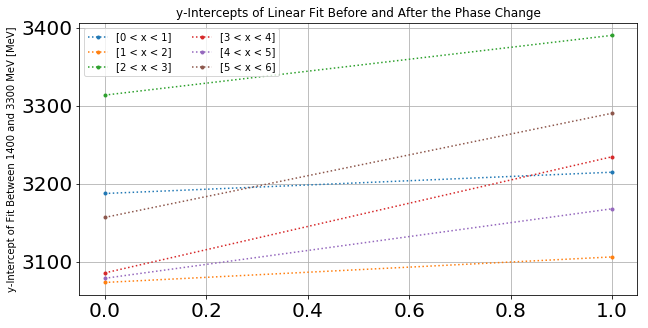

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
plt.title("y-Intercepts of Linear Fit Before and After the Phase Change")
plt.ylabel("y-Intercept of Fit Between "+str(e1)+" and "+str(e2)+" MeV [MeV]")
for i, yi in enumerate(yInts):
    plt.plot(yi,".:",label="["+str(colDivs[i])+" < x < "+str(colDivs[i+1])+"]")
plt.grid()
plt.legend(ncol=2)
plt.show()

In [16]:
deltaYs = []
for yi in yInts:
    deltaYs.append(yi[1] - yi[0])

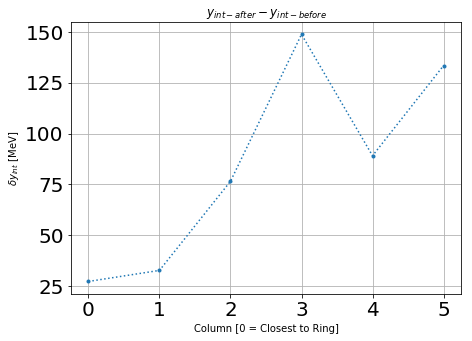

In [17]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title(r"$y_{int-after} - y_{int-before}$")
plt.xlabel("Column [0 = Closest to Ring]")
plt.ylabel(r"$\delta y_{int}$ [MeV]")
plt.plot(deltaYs,".:")
plt.grid()
plt.show()